<a href="https://colab.research.google.com/github/siriMallika/DS_IPST/blob/main/%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A1_Python_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>01</font>  นำเข้าชุดข้อมูล  

In [ ]:
import pandas as pd

In [ ]:
#อ่านไฟล์ มาเก็บใน Dataframe
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#ขอดูข้อมูลแบบมีเงื่อนไข นักเรียนที่มีคะแนนคณิตศาสตร์มากกว่า 50 คะแนน  
# df[df['math']>50] #df[df.math>50]

In [ ]:
#เลือกข้อมูลเฉพาะ math thai science english และ program
df=df[['Gender','Age','EstimatedSalary','Purchased']] #

In [ ]:
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


# <font color='red'>02</font>  การทำข้อมูลให้เป็นภาพ Data Visualization

In [ ]:
#เรียกใช้โมดูลในการสร้างกราฟ  matplotlib  และ  seaborn
import matplotlib.pyplot as plt
import seaborn as sbn

## ต้องการทราบว่าจากข้อมูลมีเพศไหนมากกว่ากัน

---



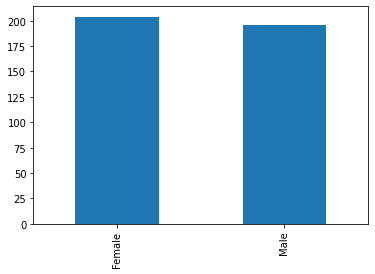

In [ ]:
#kind = bar,barh,pie
df.Gender.value_counts().plot(kind='bar')

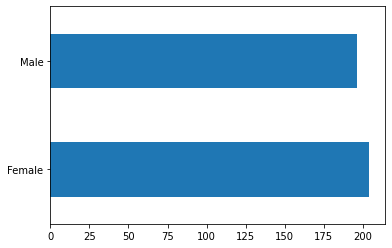

In [ ]:
#kind = bar,barh,pie
df.Gender.value_counts().plot(kind='barh')

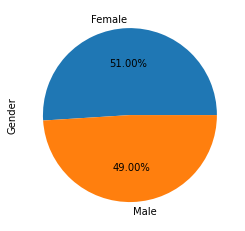

In [ ]:
#kind = bar,barh,pie
df.Gender.value_counts().plot(kind='pie',autopct='%.2f%%')

In [17]:
df.corr().round(2)

,Age,EstimatedSalary,Purchased
Age,1.00,0.16,0.62
EstimatedSalary,0.16,1.00,0.36
Purchased,0.62,0.36,1.00


In [ ]:
#kind = bar,barh,pie
# df.program.value_counts().plot(kind='pie',autopct='%.2f')

## ต้องการทราบว่าผู้ชายหรือผู้หญิงมีสถิติในการซื้อมากกว่ากัน


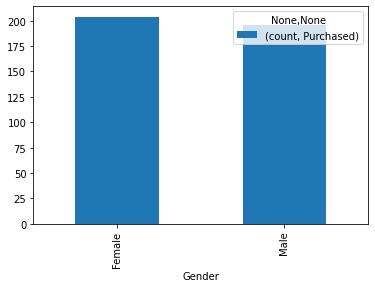

In [ ]:
pvt=df[['Gender','Purchased']].pivot_table(index=['Gender'],values=['Purchased'],aggfunc=['count'])
pvt.plot(kind='bar')

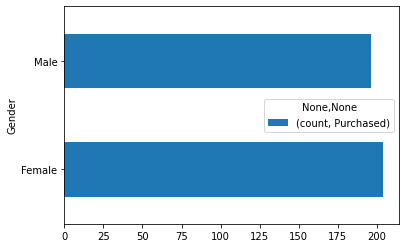

In [ ]:
pvt=df[['Gender','Purchased']].pivot_table(index=['Gender'],values=['Purchased'],aggfunc=['count'])
pvt.plot(kind='barh')

In [ ]:
# pvt=df.pivot_table(index=['program'])
# pvt.plot(kind='pie',subplots=True)

## เปรียบเทียบคะแนนเฉลี่ยแต่ละวิชาของห้อง EP

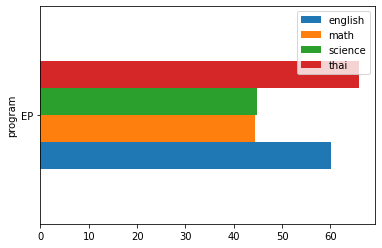

In [ ]:
pvt=df[df.program=='EP'].pivot_table(index=['program']) #EP
pvt.plot(kind='barh')

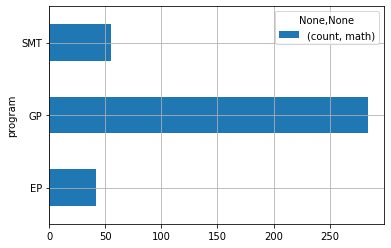

In [ ]:
#อยากรู้ว่ามีกี่คนในแต่ละแผนการเรียนที่ได้คะแนนวิชาคณิตศาสตร์มากกว่า 40 คะแนน
pvt=df[df.math>40].pivot_table(index=['program'],values=['math'],aggfunc=['count']) #>40 #program #math
pvt.plot(kind='barh').grid() #bar,barh

## เปรียบเทียบการกระจายข้อมูล

ต้องการทราบว่า "รายได้" มีการการะจายตัวอย่างไรและมีค่าสูงสุดต่ำสุดเท่าใด

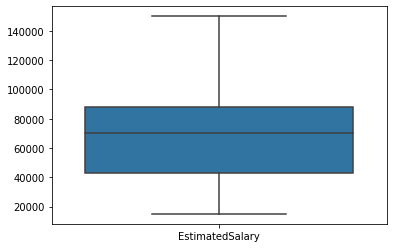

In [ ]:
sbn.boxplot(data=df[['EstimatedSalary']]) #'Gender','Age','EstimatedSalary','Purchased'

In [ ]:
max(df['EstimatedSalary'])

150000

In [ ]:
min(df['EstimatedSalary'])

15000

In [20]:
df['EstimatedSalary'].describe().round(3)

count       400.00
mean      69742.50
std       34096.96
min       15000.00
25%       43000.00
50%       70000.00
75%       88000.00
max      150000.00
Name: EstimatedSalary, dtype: float64

## ดูความสัมพันธ์และการกระจายของข้อมูล

ต้องการทราบว่า "อายุ" และ "รายได้" มีความสัมพันธ์และการกระจายของข้อมูลอย่างไร

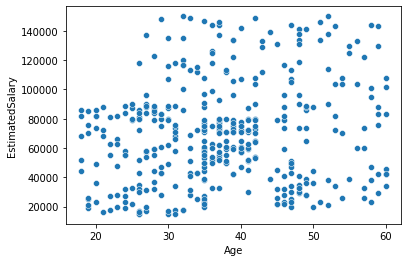

In [ ]:
sbn.scatterplot(x='Age',y='EstimatedSalary',data=df) 

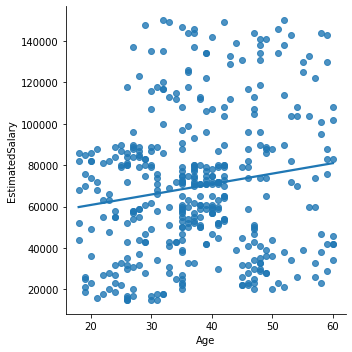

In [16]:
sbn.lmplot(x='Age',y='EstimatedSalary',data=df,ci=None)